# Name:- ARCHANA DIXIT
### Course:- DATA SCIENCE AND BUSINESS ANALYTICS 

**From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.**

In [1]:
import pandas as pd
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel("C:\\Users\\archy\\OneDrive\\Documents\\TSF-GRIP\\task-2.xlsx")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
pd.value_counts(df["Species"])

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

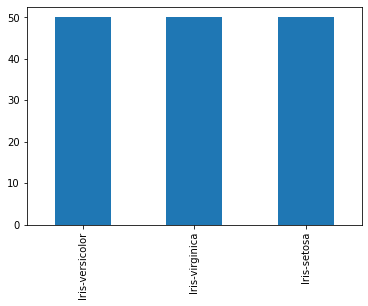

In [8]:
pd.value_counts(df["Species"]).plot(kind="bar")
plt.show

In [9]:
new_df=df.drop("Species",axis=1)

In [10]:
k_means = KMeans(n_clusters = 2)

In [11]:
k_means.fit(new_df)

KMeans(n_clusters=2)

In [12]:
k_means.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [13]:
wss =[] 

In [14]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(new_df)
    wss.append(KM.inertia_)

In [15]:
wss

[281918.32439999987,
 70616.29893333331,
 31365.589670588226,
 17783.299992887623,
 11427.652000000006,
 7928.019971794871,
 5916.245023809522,
 4555.7984415204655,
 3591.6713848039217,
 2967.2315343137257]

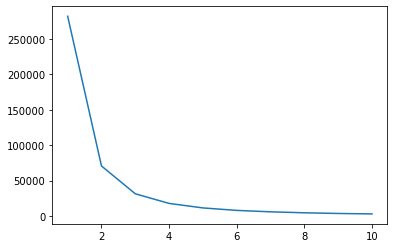

In [16]:
plt.plot(range(1,11), wss)

In [17]:
k_means = KMeans(n_clusters = 3)
k_means.fit(new_df)
labels = k_means.labels_

In [18]:
df["Clus_kmeans"] = labels
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Clus_kmeans
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [26]:
#df.head()

In [20]:
df.Clus_kmeans.value_counts().sort_index()

0    49
1    51
2    50
Name: Clus_kmeans, dtype: int64

In [30]:
cluster_profile = df.iloc[:,1:10].groupby("Clus_kmeans").mean()
cluster_profile["Freq"]=df.Clus_kmeans.value_counts()
cluster_profile

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Freq
Clus_kmeans,,,,,
0,5.006122,3.420408,1.465306,0.244898,49
1,6.570588,2.970588,5.523529,2.011765,51
2,5.922000,2.780000,4.206000,1.304000,50


***There are three clusters which have been created and the data is been segregated.***
* Cluster '0' consist 49 entries, where saple length is minimum but saple width is maximum, petal length nad petal width is minimum too.
* Cluster '1' consist of 51 entries, with maximum of sepal length, maximum of Petal length, and maximum of petal width
* Cluster '2' consist of 50 entries, with everything in mid range. 